In [1]:
from lrfhss.run import *
import time
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pickle
import pandas as pd

# Example 1: Success Probability versus Number of Nodes

Here is a simple example on how to run the simulator using most default input parameter from the class Settings. This is defined in the file runSim, which uses from the simulator classes to create the simulation environment. You can check the file to modified or create you own modified version.

We run the simulation for several different number of devices, and also run it 5 times and get the average and standard deviation of the results. The data is stored in a pandas Dataframe and saved on a .data file.

In [2]:
#Number of different number of nodes points (each simulation takes one different)
nNodes_points = 20
#Mininum amount of nodes
nNodes_min = 1000
#Maximum amount of nodes
nNodes_max = 200000
#Number of nodes is divided by 8, as we are simulating one of the 8 grid.
#As they are random selected, it is a very good approximation to consider one of them only, and it decreases the simulation time.
#In the end, we multiply this array by 8 if we want to consider the technology total capacity.
nNodes = np.linspace(nNodes_min, nNodes_max, nNodes_points, dtype=int)//8
#Number of simulation loops for each configuration.
loops = 6

start = time.perf_counter()
success = []
std = []
#For each number of nodes point, run the simulation "loops" times
for n in nNodes:
    #For each nNodes, create a new settings object with the proper input parameter
    s = Settings(number_nodes = n)
    #This line runs the simulation loops in paralel, using n_jobs as the number of threads generated.
    #Consider using a number according to the amount of reseources available to your machine to avoid crashing your system.
    results = Parallel(n_jobs=8) (delayed(run_sim)(s, seed = seed) for seed in range(0,loops))
    #At the moment we only get the network outage probability as results and append the mean of the loops (for better accuracy) to a list.
    success.append(np.mean(results))
    std.append(np.std(results))
print(f"The simulation lasted {time.perf_counter()-start} seconds.")

#Saving results on a file
df = pd.DataFrame({'Success': success, 'Std': std}, index = nNodes)
file = open('example_1.data', 'wb')
pickle.dump(df, file)
file.close()

The simulation lasted 347.7502764790006 seconds.


In [3]:
example_1 = pd.read_pickle('example_1.data')

# Example 2: Enabling ACRDA

Now we run the same simulation setup as above, but we use a ACRDA enabled base station with default parameters

In [4]:
#Number of different number of nodes points (each simulation takes one different)
nNodes_points = 20
#Mininum amount of nodes
nNodes_min = 1000
#Maximum amount of nodes
nNodes_max = 200000
#Number of nodes is divided by 8, as we are simulating one of the 8 grid.
#As they are random selected, it is a very good approximation to consider one of them only, and it decreases the simulation time.
#In the end, we multiply this array by 8 if we want to consider the technology total capacity.
nNodes = np.linspace(nNodes_min, nNodes_max, nNodes_points, dtype=int)//8
#Number of simulation loops for each configuration.
loops = 6

start = time.perf_counter()
success = []
std = []
#For each number of nodes point, run the simulation "loops" times
for n in nNodes:
    #For each nNodes, create a new settings object with the proper input parameter
    s = Settings(number_nodes = n, base='acrda')
    #This line runs the simulation loops in paralel, using n_jobs as the number of threads generated.
    #Consider using a number according to the amount of reseources available to your machine to avoid crashing your system.
    results = Parallel(n_jobs=8) (delayed(run_sim)(s, seed = seed) for seed in range(0,loops))
    #At the moment we only get the network outage probability as results and append the mean of the loops (for better accuracy) to a list.
    success.append(np.mean(results))
    std.append(np.std(results))
print(f"The simulation lasted {time.perf_counter()-start} seconds.")

#Saving results on a file
df = pd.DataFrame({'Success': success, 'Std': std}, index = nNodes)
file = open('example_2.data', 'wb')
pickle.dump(df, file)
file.close()

The simulation lasted 461.7697207680003 seconds.


In [5]:
example_2 = pd.read_pickle('example_2.data')

# Plotting the examples

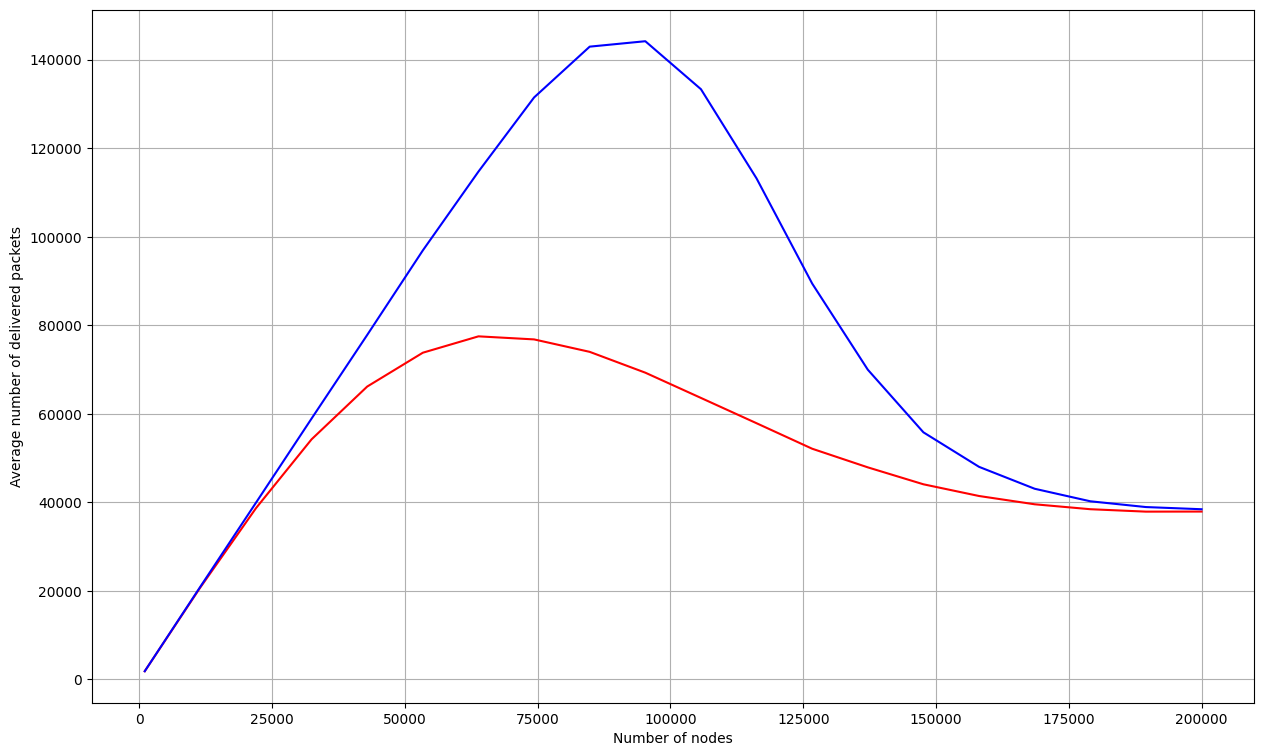

In [7]:
plt.figure(figsize=(15,9))
plt.plot(nNodes*8, example_1['Success'],color='red')
plt.plot(nNodes*8, example_2['Success'],color='blue')
plt.xlabel("Number of nodes")
plt.ylabel("Average number of delivered packets")
plt.grid()
plt.show()